In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df=pd.read_csv(r"C:\Users\Admin\Documents\EDA\Visadataset - Visadataset (1).csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**outlier**

- very very huge observation
- very very small observation
- which pull the data in any side of the
- mild outliers
- q1-1.5/qur and q3+1.5iqr
  - strong outliers

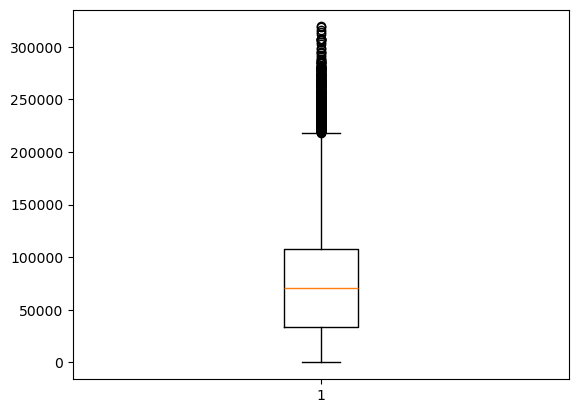

In [6]:
plt.boxplot(visa_df["prevailing_wage"]vert)
plt.show()

*** finding the outliers***`

- outliers are avialable less thean q1-1.5*iqr
- outliers are available grater then q3+1.5*iqr
- step1:
  - calculate q1 
  - calculate q2
   - calculate iqr: q3-q1
- step2
- lb= q1-1.5*iqr
- ub= q3+1.5*iqr
- step 3
- con1=visa_df[prevailing_wage]<lb
- con2=visa_df[prevailing_wage]>ub
- apply or operator and get the outliers data

In [8]:
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q1

34015.48

In [9]:
q3=round(np.percentile(visa_df["prevailing_wage"],75),2)
q3

107735.51

In [11]:
iqr=q3-q1
iqr

73720.03

In [12]:
lb=q1-1.5*(iqr)
ub=q3+1.5*(iqr)

In [13]:
con1=visa_df["prevailing_wage"]<lb
con2=visa_df["prevailing_wage"]>ub


In [22]:
outliers_data=len(visa_df[con1 | con2 ])
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)
print(outliers_data)

427


**Histogram**

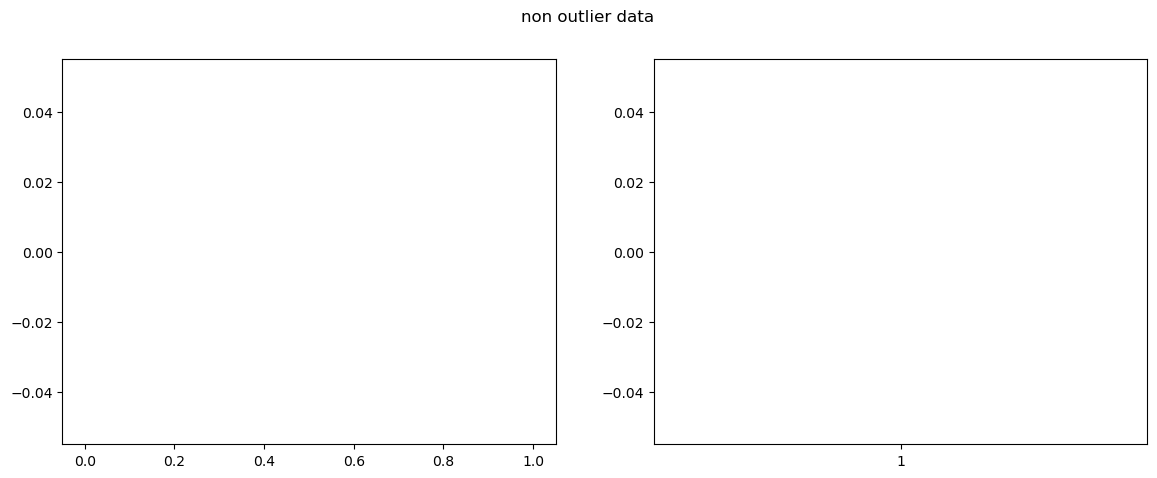

In [23]:
plt.figure(figsize=(14,5))
plt.suptitle("non outlier data")
plt.subplot(1,2,1).hist(non_outliers_data["prevailing_wage"])
plt.subplot(1,2,2).boxplot(non_outliers_data["prevailing_wage"])
plt.show()

**how to deal the outliears**

In [ ]:
- drop the ourliears 
-  drop the outliears is not a good a idea 
-  when you drop  the outliers,data will loss
- for exaple her we are droping 427 rows
- x% of 25480=427
- it is  1.7% data, her it is fine we can drop the outliers
*** method-2***
    - we already know that outliers does not affect the median 
   - so we cam fill outliers

In [26]:
l1=[]
med=df["prevailing_wage"].median()
for i in df["prevailing_wage"].values:
    if i<lb or i>ub:
        li.append(med)
else:
    li.append(i)

len(li)

NameError: name 'df' is not defined

**np.where**
- np.where will use for binary condition 
- it has 3 arguments 
- condition 
- value if condition is true
- value if condition false

In [30]:
d={"sub":["ds","ml","cs"],"marks": [100,150,20]}
data=pd.DataFrame(d)

In [ ]:
visa_df